In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\computer\Downloads\Medications_image.csv")

In [2]:
df2 = df.Brand.str.contains('Symbicort')

In [3]:
df[df2].to_csv(r"C:\Users\computer\Downloads\Symbicort.csv")

In [4]:
df = pd.read_csv(r"C:\Users\computer\Downloads\Symbicort.csv")

In [5]:
import re
import unicodedata
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

ADDITIONAL_STOPWORDS = ['alot','2nd','saba','mdi','fostair','nexthaler','many','like']

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\computer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\computer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
def basic_clean(image):
  
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  image = (unicodedata.normalize('NFKD', image)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', image).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [7]:
words = basic_clean(''.join(str(df['Description'].tolist())))

In [8]:
words[:20]

['line',
 'costly',
 'device',
 'bad',
 'cost',
 'formulary',
 'choice',
 'first',
 'experience',
 'symbicort',
 'high',
 'efficacy',
 'patient',
 'happy',
 'ease',
 'use',
 'excellent',
 'product',
 'great',
 'device']

In [9]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]

(inhaler, device)       7
(easy, use)             6
(dry, powder)           6
(cost, cost)            5
(smart, use)            4
(turbohaler, device)    4
(long, time)            4
(use, cost)             3
(device, expensive)     3
(device, smart)         3
(patient, seem)         3
(smart, dosing)         3
(use, device)           3
(turbo, haler)          3
(track, record)         3
(ease, use)             3
(used, asthma)          3
(well, known)           3
(tried, tested)         3
(around, long)          3
dtype: int64

In [10]:
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]

(around, long, time)         3
(device, easy, use)          3
(use, cost, cost)            3
(smart, dosing, inhaler)     2
(dosing, inhaler, device)    2
(turbo, haler, device)       2
(used, asthma, copd)         2
(smart, use, device)         2
(device, turbo, haler)       2
(wise, trusted, well)        1
(cost, commonly, used)       1
(usually, device, turbo)     1
(use, titrate, dose)         1
(trusted, smart, dosing)     1
(haler, device, get)         1
(old, fashioned, patient)    1
(one, fighting, seretide)    1
(flow, rate, relatively)     1
(seretde, one, standard)     1
(come, azeneca, compnay)     1
dtype: int64

In [11]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]

<AxesSubplot:>

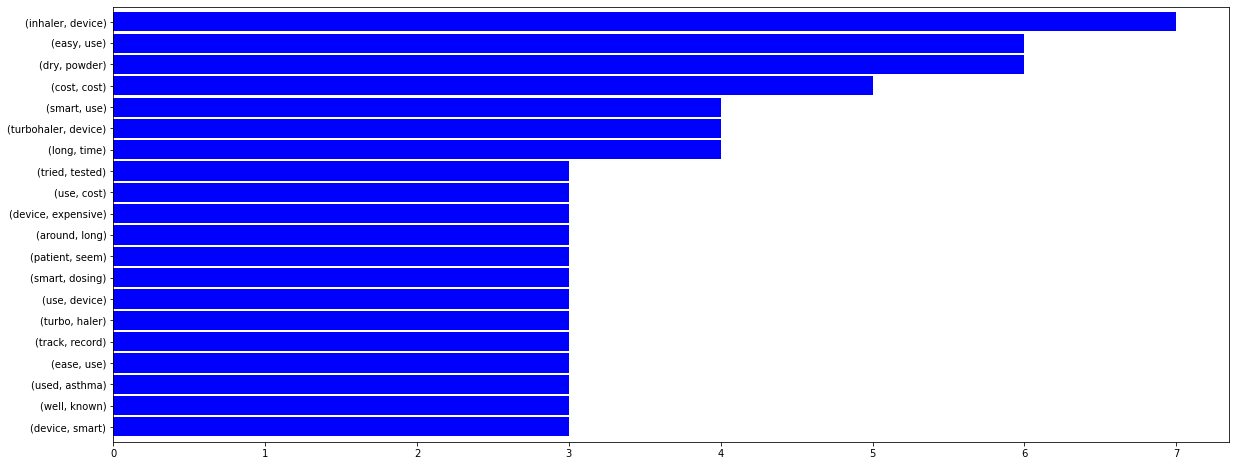

In [12]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(20, 8))

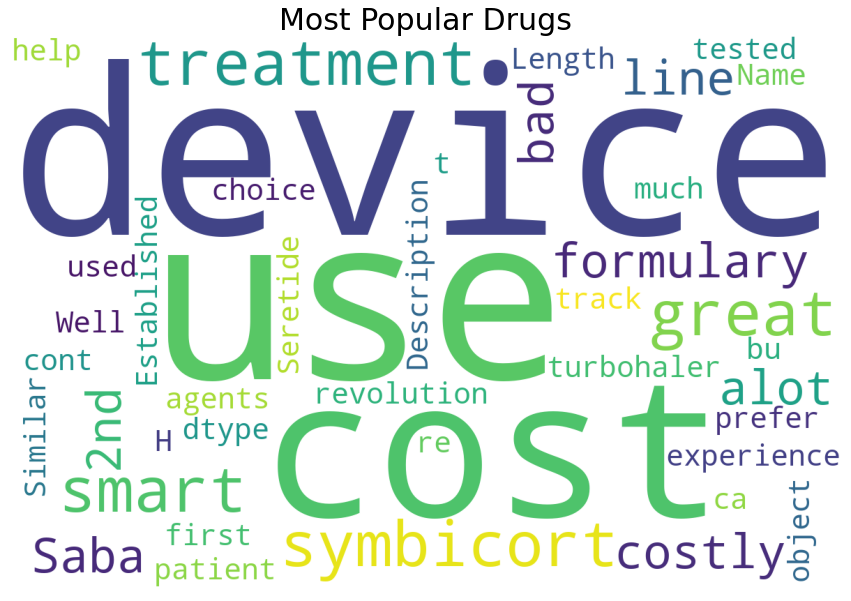

In [13]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width = 1200, height = 800).generate(str(df['Description']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Popular Drugs', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [14]:
from textblob import TextBlob
df['polarity'] = df["Description"].astype(str).apply(lambda x: TextBlob(x).polarity)
df['subjective'] = df["Description"].astype(str).apply(lambda x: TextBlob(x).subjectivity)

In [15]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english') + ['alot','2nd','saba','mdi','fostair','nexthaler','many','like']

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(df["Description"])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [17]:
df_ngram['polarity'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram['subjective'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)
df_ngram.to_csv(r'C:\Users\computer\Downloads\Symbicort-BigramSentiment.csv')
print(df_ngram.head(20))

    frequency     bigram/trigram  polarity  subjective
0           6     inhaler device  0.000000    0.000000
1           6           easy use  0.433333    0.833333
2           6         dry powder -0.066667    0.600000
3           4  turbohaler device  0.000000    0.000000
4           4          smart use  0.214286    0.642857
5           4          long time -0.050000    0.400000
6           4          cost cost  0.000000    0.000000
7           3         well known  0.000000    0.000000
8           3         used smart  0.214286    0.642857
9           3        used asthma  0.000000    0.000000
10          3         use device  0.000000    0.000000
11          3      use cost cost  0.000000    0.000000
12          3           use cost  0.000000    0.000000
13          3        turbo haler  0.000000    0.000000
14          3       tried tested  0.000000    0.000000
15          3       track record  0.000000    0.000000
16          3    symbicort smart  0.214286    0.642857
17        

In [18]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\computer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
import numpy as np

df = pd.read_csv(r"C:\Users\computer\Downloads\Symbicort.csv")
df.head()

,Unnamed: 0,Respondent_Serial,Brand,Description
0,2,10,Symbicort,2nd line after Saba .
1,6,11,Symbicort,costly . device not bad . cost . formulary...
2,12,15,Symbicort,I have alot of experience with symbicort . H...
3,25,19,Symbicort,"A great device - turbohaler , Great agents bu..."
4,30,20,Symbicort,This was a revolution in treatment when it ca...


In [20]:
df['scores'] = df['Description'].apply(lambda review: sid.polarity_scores(review))
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
df.head()

,Unnamed: 0,Respondent_Serial,Brand,Description,scores,compound,comp_score
0,2,10,Symbicort,2nd line after Saba .,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
1,6,11,Symbicort,costly . device not bad . cost . formulary...,"{'neg': 0.137, 'neu': 0.585, 'pos': 0.278, 'co...",0.3506,pos
2,12,15,Symbicort,I have alot of experience with symbicort . H...,"{'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'comp...",0.8878,pos
3,25,19,Symbicort,"A great device - turbohaler , Great agents bu...","{'neg': 0.0, 'neu': 0.614, 'pos': 0.386, 'comp...",0.8934,pos
4,30,20,Symbicort,This was a revolution in treatment when it ca...,"{'neg': 0.051, 'neu': 0.678, 'pos': 0.271, 'co...",0.9718,pos


In [21]:
df.to_csv(r'C:\Users\computer\Downloads\SymbicortSentiment.csv')

In [22]:
import re
import spacy

from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

# import vectorizers
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# import numpy for matrix operation
import numpy as np

# import LDA from sklearn
from sklearn.decomposition import LatentDirichletAllocation

In [23]:
nlp = spacy.load('en_core_web_sm')

In [24]:
df = pd.read_csv(r"C:\Users\computer\Downloads\Symbicort.csv")

In [25]:
stoplist = stopwords.words('english') + ['alot','2nd','saba','mdi','fostair','nexthaler','many','like']
stop = set(stoplist)

# punctuation 
exclude = set(string.punctuation) 

# lemmatization
lemma = WordNetLemmatizer() 

# One function for all the steps:
def clean(doc):
    
    # convert text into lower case + split into words
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    
    # remove any stop words present
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)  
    
    # remove punctuations + normalize the text
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())  
    return normalized

# clean data stored in a new list
clean_corpus = [clean(doc).split() for doc in df['Description']]  

In [26]:
# Converting text into numerical representation
tf_idf_vectorizer = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False)

# Converting text into numerical representation
cv_vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
# Array from TF-IDF Vectorizer 
tf_idf_arr = tf_idf_vectorizer.fit_transform(clean_corpus)

# Array from Count Vectorizer 
cv_arr = cv_vectorizer.fit_transform(clean_corpus)
vocab_tf_idf = tf_idf_vectorizer.get_feature_names()
vocab_cv = cv_vectorizer.get_feature_names()

In [27]:
lda_model = LatentDirichletAllocation(n_components = 6, max_iter = 20, random_state = 20)

# fit transform on model on our count_vectorizer : running this will return our topics 
X_topics = lda_model.fit_transform(tf_idf_arr)

# .components_ gives us our topic distribution 
topic_words = lda_model.components_

In [28]:
n_top_words = 5

for i, topic_dist in enumerate(topic_words):
    
    # np.argsort to sorting an array or a list or the matrix acc to their values
    sorted_topic_dist = np.argsort(topic_dist)
    
    # Next, to view the actual words present in those indexes we can make the use of the vocab created earlier
    topic_words = np.array(vocab_tf_idf)[sorted_topic_dist]
    
    # so using the sorted_topic_indexes we ar extracting the words from the vocabulary
    # obtaining topics + words
    # this topic_words variable contains the Topics  as well as the respective words present in those Topics
    topic_words = topic_words[:-n_top_words:-1]
    print ("Topic", str(i+1), topic_words)

Topic 1 ['smart' 'well' 'device' 'costly']
Topic 2 ['therapy' 'smart' 'great' 'device']
Topic 3 ['seems' 'ccg' 'asthma' 'patient']
Topic 4 ['cost' 'effective' 'expensive' 'use']
Topic 5 ['use' 'much' 'prefer' 'smart']
Topic 6 ['good' 'patient' 'smart' 'use']
